In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Load the customer data into a pandas dataframe
df = pd.read_csv("bank.csv",sep = ';')

In [3]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
df.shape

(4521, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
missing_report = df.isnull().sum().reset_index().assign(
    misisng_percentage=lambda x: x[0]/df.shape[0]
).sort_values(by="misisng_percentage", ascending=False).rename(columns={
"index": "column name", 0: "missing row count", "misisng_percentage" : "missing percentage"
})
missing_report = missing_report[missing_report['missing percentage']>0]
missing_report

Empty DataFrame
Columns: [column name, missing row count, missing percentage]
Index: []

#### No missing values in the record.

In [8]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [9]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [10]:
df.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000

<AxesSubplot:>

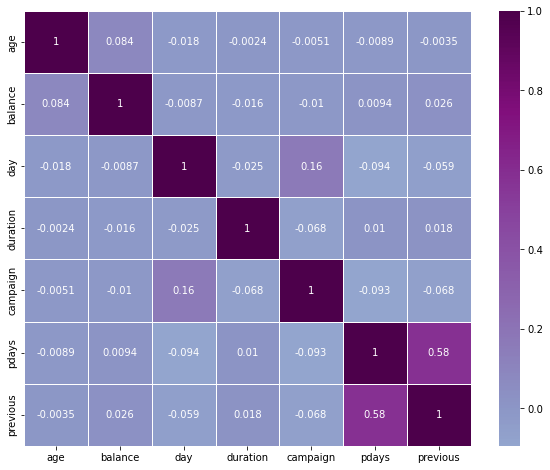

In [11]:
plt.rcParams['figure.figsize']=(10,8)
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='BuPu',linewidths=.5,center=0)

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [13]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<AxesSubplot:title={'center':'Type of Job'}>

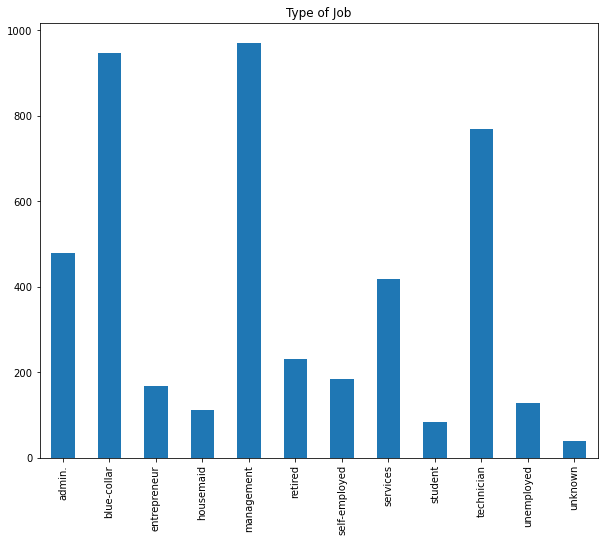

In [14]:
df['job'].value_counts().sort_index().plot(kind="bar", title="Type of Job")

<AxesSubplot:xlabel='y', ylabel='count'>

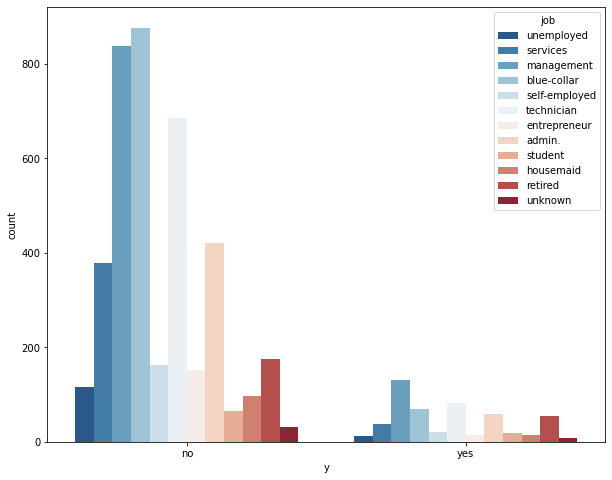

In [15]:
sns.countplot(x='y',hue='job',data=df,palette='RdBu_r')

In [16]:
marital_count = df['marital'].value_counts()

In [17]:
marital_count

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [18]:
fig = px.bar(df, x='marital',color="marital",title = 'Marital Status')
fig.show()
#printing a plotly graph can sometimes create issue.

<AxesSubplot:xlabel='y', ylabel='count'>

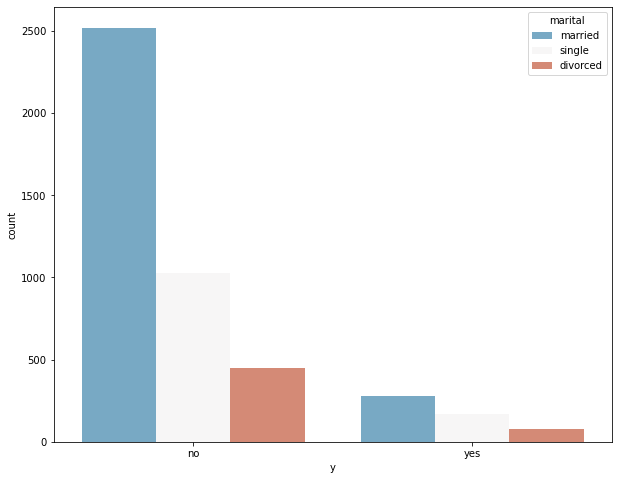

In [19]:
sns.countplot(x='y',hue='marital',data=df,palette='RdBu_r')

In [20]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [21]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

<AxesSubplot:title={'center':'Outcome of the previous marketing campaign'}>

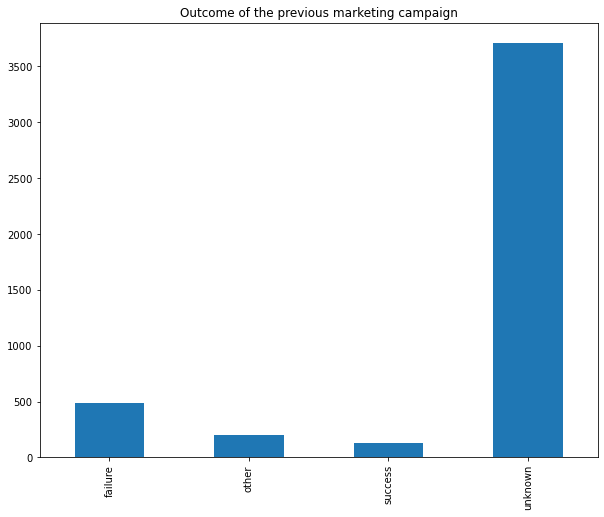

In [22]:
df['poutcome'].value_counts().sort_index().plot(kind="bar", title="Outcome of the previous marketing campaign")

In [23]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [24]:
100*df['y'].value_counts()/len(df['y'])

no     88.476001
yes    11.523999
Name: y, dtype: float64

##### Clients who has subscribed a term deposit was just 521 i.e. 11.52%.

<AxesSubplot:xlabel='job', ylabel='count'>

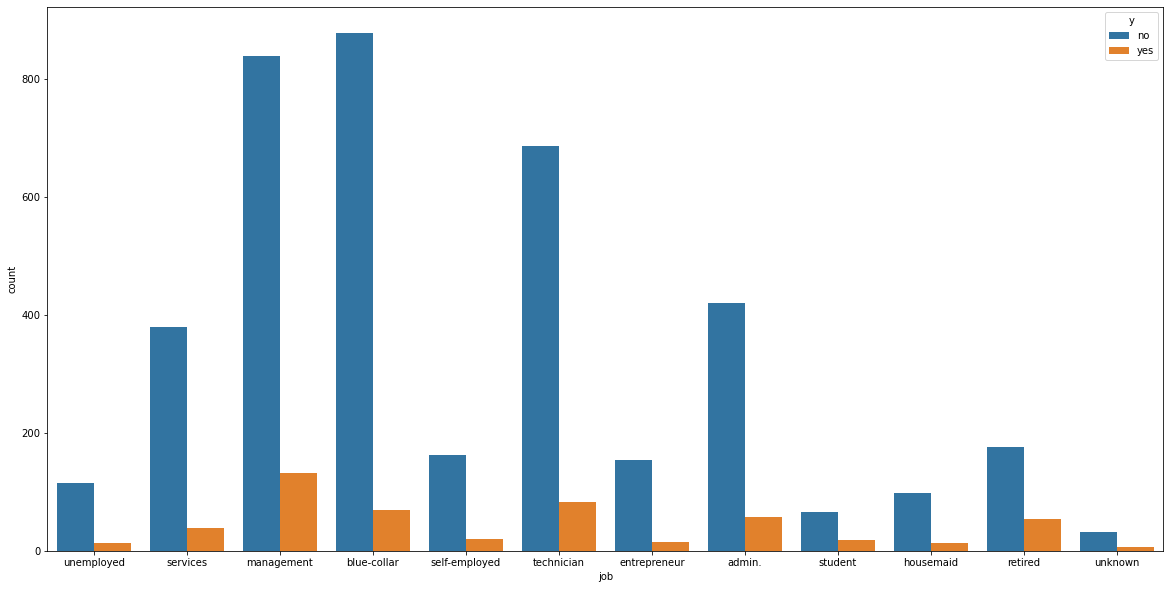

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',data=df,hue='y')

<AxesSubplot:>

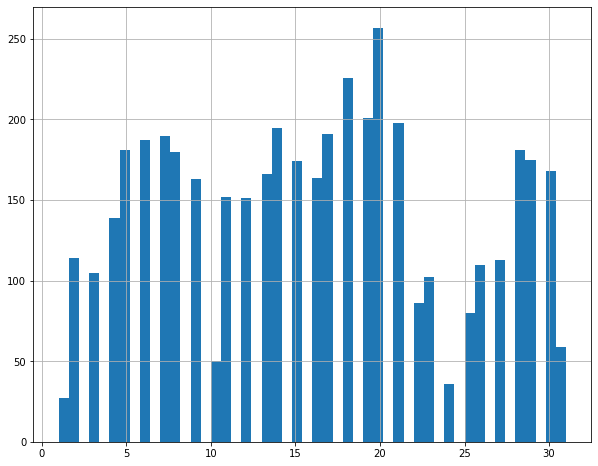

In [26]:
df['day'].hist(bins=50)

<AxesSubplot:xlabel='loan', ylabel='count'>

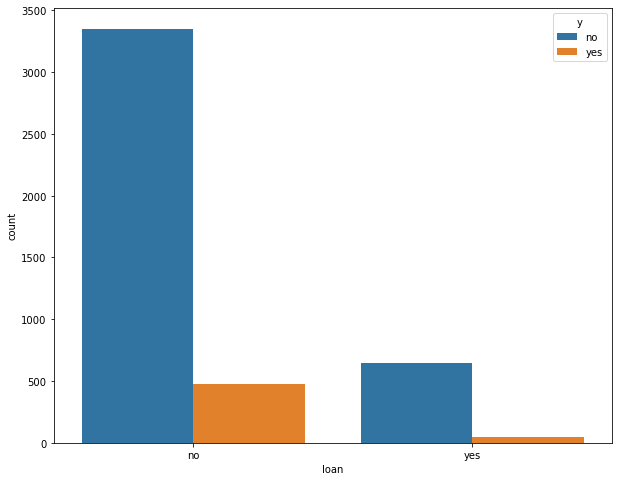

In [27]:
sns.countplot(x='loan',data=df,hue='y')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\LENOVO\anaconda3\lib\site

<AxesSubplot:xlabel='previous', ylabel='Density'>

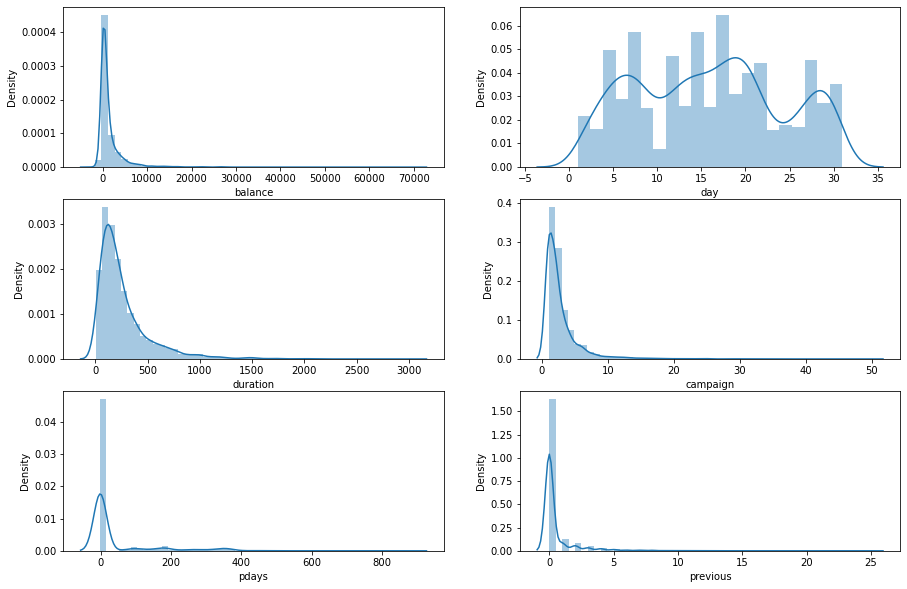

In [28]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.distplot(df['balance'],ax=axes[0,0])
sns.distplot(df['day'],ax=axes[0,1])
sns.distplot(df['duration'],ax=axes[1,0])
sns.distplot(df['campaign'],ax=axes[1,1])
sns.distplot(df['pdays'],ax=axes[2,0])
sns.distplot(df['previous'],ax=axes[2,1])

<AxesSubplot:xlabel='y', ylabel='previous'>

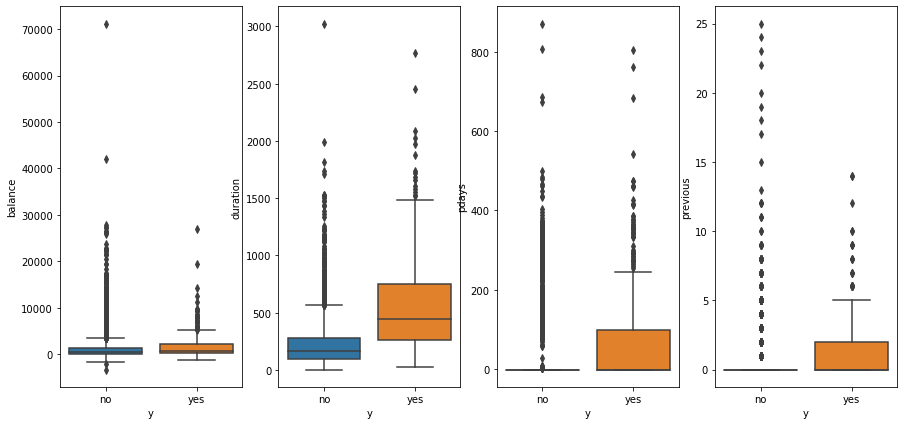

In [29]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
sns.boxplot(y=df['balance'],x=df['y'],ax=axes[0])
sns.boxplot(y=df['duration'],x=df['y'],ax=axes[1])    
sns.boxplot(y=df['pdays'],x=df['y'],ax=axes[2])    
sns.boxplot(y=df['previous'],x=df['y'],ax=axes[3]) 

#### Data cleaning & Processing

##### There are unknown values too be seen in the dataset. We will set those values to NaN.

In [5]:
df.replace('unknown', np.nan, inplace=True)

In [6]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0      NaN  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3          NaN    3   jun       199         4     -1         0      NaN  no  
4          NaN    5   may       226         1     -1         0      NaN  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0      NaN  no  
4517       NaN    9   may       153         1     -1         0      NaN  no  
4518  cellular   19   aug       151        11     -1         0      NaN  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [34]:
df.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [35]:
(3705/df.poutcome.shape[0])*100

81.95089581950896

It can be seen that approx. 82% of poutcomes are null. Therefore we simply drop the column 'poutcomes'.

In [7]:
#drop column poutcome
df.drop('poutcome', inplace = True, axis = 1)
df.drop('contact', inplace = True, axis = 1)

In [8]:
df.drop(['day','month'], inplace = True, axis = 1)


In [9]:
df["job"].fillna(method = "ffill",inplace=True)

In [10]:
df["education"].fillna(method = "ffill",inplace= True)

This line of code is filling missing values in the "job" column of the "df" DataFrame using forward fill (ffill) method. The fillna method is used to fill missing values in a pandas DataFrame. The method argument specifies the method used to fill the missing values. In this case, ffill means that missing values will be filled with the previous value in the column.

In [13]:
#converting 'yes' or 'no' to binary values 1 or 0 respectively.
var_list=['default','housing','loan','y']

In [14]:
def binary_map(s):
    return s.map({'yes':1,'no':0})

In [15]:
df[var_list] = df[var_list].apply(binary_map)

In [16]:
df.sample(10)

age           job   marital  education  default  balance  housing  loan  \
240    34        admin.    single  secondary        0        1        1     0   
2374   32   blue-collar  divorced  secondary        0      739        1     0   
2162   40        admin.    single  secondary        0       -1        0     0   
3067   34    management    single   tertiary        0      318        1     0   
2038   33   blue-collar    single  secondary        0     5137        1     0   
2286   30    technician    single  secondary        0      790        0     0   
4119   52       retired    single  secondary        0      316        0     0   
3390   42  entrepreneur   married    primary        1       66        1     1   
1353   44    technician   married   tertiary        0     1146        0     0   
3621   35    management   married   tertiary        0      949        1     0   

      duration  campaign  pdays  previous  y  
240        483         7     -1         0  0  
2374       171         1     -1         0  0  
2162       173         1     -1         0  0  
3067       133         2     -1         0  0  
2038       123         1     -1         0  0  
2286       696         3     -1         0  0  
4119       463         3     -1         0  0  
3390       139         1     -1         0  0  
1353       178         2     -1         0  0  
3621       245         2     -1         0  0

In [17]:
job = pd.get_dummies(df['job'])
job

admin.  blue-collar  entrepreneur  housemaid  management  retired  \
0          0            0             0          0           0        0   
1          0            0             0          0           0        0   
2          0            0             0          0           1        0   
3          0            0             0          0           1        0   
4          0            1             0          0           0        0   
...      ...          ...           ...        ...         ...      ...   
4516       0            0             0          0           0        0   
4517       0            0             0          0           0        0   
4518       0            0             0          0           0        0   
4519       0            1             0          0           0        0   
4520       0            0             1          0           0        0   

      self-employed  services  student  technician  unemployed  
0                 0         0        0           0           1  
1                 0         1        0           0           0  
2                 0         0        0           0           0  
3                 0         0        0           0           0  
4                 0         0        0           0           0  
...             ...       ...      ...         ...         ...  
4516              0         1        0           0           0  
4517              1         0        0           0           0  
4518              0         0        0           1           0  
4519              0         0        0           0           0  
4520              0         0        0           0           0  

[4521 rows x 11 columns]

In [18]:
marital_df = pd.get_dummies(df['marital'])
marital_df

divorced  married  single
0            0        1       0
1            0        1       0
2            0        0       1
3            0        1       0
4            0        1       0
...        ...      ...     ...
4516         0        1       0
4517         0        1       0
4518         0        1       0
4519         0        1       0
4520         0        0       1

[4521 rows x 3 columns]

In [19]:
edu = pd.get_dummies(df['education'])
edu

primary  secondary  tertiary
0           1          0         0
1           0          1         0
2           0          0         1
3           0          0         1
4           0          1         0
...       ...        ...       ...
4516        0          1         0
4517        0          0         1
4518        0          1         0
4519        0          1         0
4520        0          0         1

[4521 rows x 3 columns]

Therefore instead of 'job', 'marital' and 'education' we will add the above three tables which did through One-hot encoding.

So first we'll drop the 'job', 'marital' and 'education' columns and then add the rest.

In [20]:
df = df.drop(['job','marital','education'], axis=1)

In [21]:
df = pd.concat([df,job, marital_df, edu], axis=1)
df.head()

age  default  balance  housing  loan  duration  campaign  pdays  previous  \
0   30        0     1787        0     0        79         1     -1         0   
1   33        0     4789        1     1       220         1    339         4   
2   35        0     1350        1     0       185         1    330         1   
3   30        0     1476        1     1       199         4     -1         0   
4   59        0        0        1     0       226         1     -1         0   

   y  ...  services  student  technician  unemployed  divorced  married  \
0  0  ...         0        0           0           1         0        1   
1  0  ...         1        0           0           0         0        1   
2  0  ...         0        0           0           0         0        0   
3  0  ...         0        0           0           0         0        1   
4  0  ...         0        0           0           0         0        1   

   single  primary  secondary  tertiary  
0       0        1          0         0  
1       0        0          1         0  
2       1        0          0         1  
3       0        0          0         1  
4       0        0          1         0  

[5 rows x 27 columns]

In [78]:
df.shape

(4521, 27)

In [56]:
df.corr()

age   default   balance   housing      loan       day  \
age            1.000000 -0.017885  0.083820 -0.193888 -0.011250 -0.017853   
default       -0.017885  1.000000 -0.070886  0.006881  0.063994 -0.013261   
balance        0.083820 -0.070886  1.000000 -0.050227 -0.071349 -0.008677   
housing       -0.193888  0.006881 -0.050227  1.000000  0.018451 -0.031291   
loan          -0.011250  0.063994 -0.071349  0.018451  1.000000 -0.004879   
day           -0.017853 -0.013261 -0.008677 -0.031291 -0.004879  1.000000   
duration      -0.002367 -0.011615 -0.015950  0.015740 -0.004997 -0.024629   
campaign      -0.005148 -0.012348 -0.009976 -0.003574  0.017120  0.160706   
pdays         -0.008894 -0.026317  0.009437  0.116893 -0.031086 -0.094352   
previous      -0.003511 -0.026656  0.026196  0.038621 -0.022115 -0.059114   
y              0.045092  0.001303  0.017905 -0.104683 -0.070517 -0.011244   
admin.        -0.048118 -0.011722 -0.023104  0.042190  0.034517  0.015542   
blue-collar   -0.045739 -0.008590 -0.056174  0.169547  0.015349 -0.028935   
entrepreneur   0.018410  0.037206  0.014190 -0.006528  0.047895 -0.013991   
housemaid      0.093626  0.001107  0.034337 -0.071359 -0.016818 -0.012272   
management    -0.028826 -0.010065  0.060405 -0.052544 -0.042093  0.022796   
retired        0.452992 -0.007018  0.069437 -0.164480 -0.009638 -0.009645   
self-employed  0.006497  0.007730 -0.002766 -0.037655  0.005350  0.006725   
services      -0.077056 -0.000358 -0.033996  0.072671  0.020765 -0.014637   
student       -0.186691 -0.005250  0.005540 -0.091039 -0.053891  0.007968   
technician    -0.069667  0.009083 -0.014348 -0.016710  0.001142  0.015705   
unemployed    -0.001015  0.008387 -0.018648 -0.041616 -0.025268  0.001607   
divorced       0.148043  0.048878 -0.036284 -0.001197  0.017798 -0.007121   
married        0.275139 -0.039031  0.017158  0.038432  0.032272 -0.001438   
single        -0.410768  0.007391  0.007525 -0.041449 -0.048496  0.006769   
primary        0.231051 -0.004269 -0.001589 -0.003372 -0.022347 -0.017788   
secondary     -0.092726  0.022657 -0.070704  0.101702  0.065802  0.006544   
tertiary      -0.081414 -0.021063  0.077432 -0.106940 -0.053364  0.006909   

               duration  campaign     pdays  previous  ...  services  \
age           -0.002367 -0.005148 -0.008894 -0.003511  ... -0.077056   
default       -0.011615 -0.012348 -0.026317 -0.026656  ... -0.000358   
balance       -0.015950 -0.009976  0.009437  0.026196  ... -0.033996   
housing        0.015740 -0.003574  0.116893  0.038621  ...  0.072671   
loan          -0.004997  0.017120 -0.031086 -0.022115  ...  0.020765   
day           -0.024629  0.160706 -0.094352 -0.059114  ... -0.014637   
duration       1.000000 -0.068382  0.010380  0.018080  ... -0.001383   
campaign      -0.068382  1.000000 -0.093137 -0.067833  ...  0.001881   
pdays          0.010380 -0.093137  1.000000  0.577562  ... -0.010945   
previous       0.018080 -0.067833  0.577562  1.000000  ... -0.017496   
y              0.401118 -0.061147  0.104087  0.116714  ... -0.024819   
admin.        -0.038833 -0.018561  0.034518  0.020941  ... -0.110552   
blue-collar    0.025468  0.008870  0.007579 -0.016205  ... -0.165502   
entrepreneur   0.015349 -0.011824 -0.015996 -0.014229  ... -0.063450   
housemaid      0.020375 -0.015347 -0.021763 -0.017832  ... -0.051239   
management    -0.006690  0.031539  0.010728  0.003950  ... -0.167918   
retired        0.018361 -0.025186 -0.011625  0.005992  ... -0.074430   
self-employed -0.001757  0.030585 -0.024401  0.005026  ... -0.066103   
services      -0.001383  0.001881 -0.010945 -0.017496  ...  1.000000   
student       -0.008087 -0.017734  0.008175  0.034265  ... -0.044033   
technician    -0.021138 -0.009493 -0.003692  0.007991  ... -0.145448   
unemployed     0.023871 -0.007735 -0.005072 -0.005108  ... -0.055064   
divorced       0.021373 -0.022157 -0.003411 -0.022158  ...  0.030721   
married       -0.036436  0.022000 -0.016537 -0.017640  ...

<AxesSubplot:>

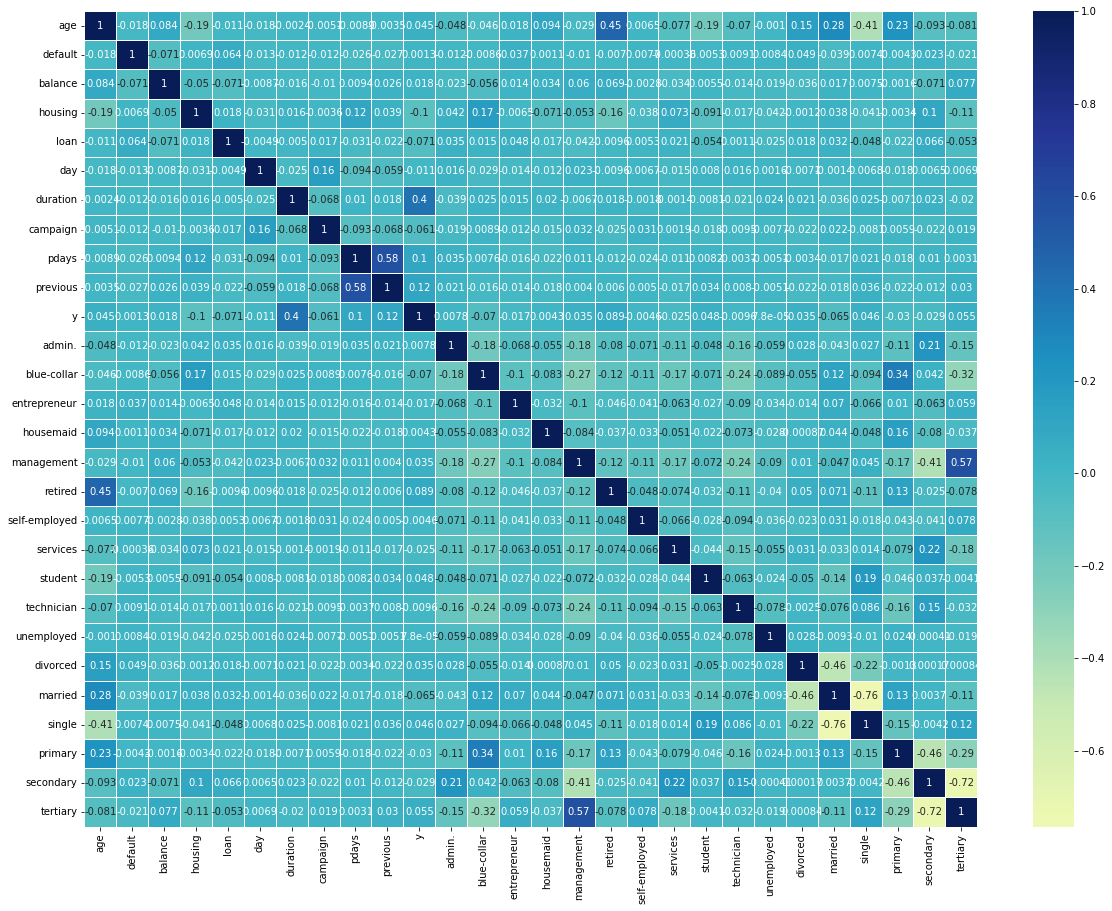

In [63]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='YlGnBu',linewidths=.5,center=0)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

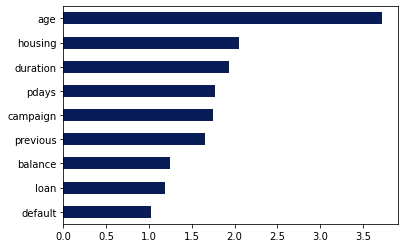

In [23]:
# checking multi co-linearity
_ = df[['age', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous']]
vif_lst = []
for i in range(_.shape[1]):
    vif = variance_inflation_factor(_.to_numpy(),i)
    vif_lst.append(vif)
s1 = pd.Series(vif_lst, index = _.columns)
s1.sort_values().plot(kind = "barh", cmap = "YlGnBu_r")

All the features are independent from each other.

#### Model building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN

In [25]:
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression

In [26]:
x = df.drop('y',axis=1)
x

age  default  balance  housing  loan  duration  campaign  pdays  \
0      30        0     1787        0     0        79         1     -1   
1      33        0     4789        1     1       220         1    339   
2      35        0     1350        1     0       185         1    330   
3      30        0     1476        1     1       199         4     -1   
4      59        0        0        1     0       226         1     -1   
...   ...      ...      ...      ...   ...       ...       ...    ...   
4516   33        0     -333        1     0       329         5     -1   
4517   57        1    -3313        1     1       153         1     -1   
4518   57        0      295        0     0       151        11     -1   
4519   28        0     1137        0     0       129         4    211   
4520   44        0     1136        1     1       345         2    249   

      previous  admin.  ...  services  student  technician  unemployed  \
0            0       0  ...         0        0           0           1   
1            4       0  ...         1        0           0           0   
2            1       0  ...         0        0           0           0   
3            0       0  ...         0        0           0           0   
4            0       0  ...         0        0           0           0   
...        ...     ...  ...       ...      ...         ...         ...   
4516         0       0  ...         1        0           0           0   
4517         0       0  ...         0        0           0           0   
4518         0       0  ...         0        0           1           0   
4519         3       0  ...         0        0           0           0   
4520         7       0  ...         0        0           0           0   

      divorced  married  single  primary  secondary  tertiary  
0            0        1       0        1          0         0  
1            0        1       0        0          1         0  
2            0        0       1        0          0         1  
3            0        1       0        0          0         1  
4            0        1       0        0          1         0  
...        ...      ...     ...      ...        ...       ...  
4516         0        1       0        0          1         0  
4517         0        1       0        0          0         1  
4518         0        1       0        0          1         0  
4519         0        1       0        0          1         0  
4520         0        0       1        0          0         1  

[4521 rows x 26 columns]

In [27]:
y = df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [31]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8729281767955801


##### The data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [32]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

The above code defines an instance of the SMOTEENN class from the imbalanced-learn library, which is a combination of the Synthetic Minority Over-sampling Technique (SMOTE) and the Edited Nearest Neighbours (ENN) algorithm. Then it fits the resampling of the input data x and target variable y using the fit_resample() method of the sm instance, and returns the resampled data X_resampled and the corresponding resampled target variable y_resampled.

In [33]:
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled,test_size=0.20)

In [34]:
model_smoteenn = LogisticRegression()
model.fit(xr_train, yr_train)

LogisticRegression()

In [35]:
# Make predictions on the test data
yr_pred = model.predict(xr_test)

In [36]:
# Evaluate the model's accuracy
accuracy = accuracy_score(yr_test, yr_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9240506329113924


Since our data was imbalanced, we used SMOTEENN to handle class imbalance in the dataset. Thus our model accuracy was increased from 0.87 to 0.92 which is way better.

In [37]:
model_smoteenn.fit(xr_train,yr_train)
yr_predict = model_smoteenn.predict(xr_test)
model_score_r = model_smoteenn.score(xr_test, yr_test)
print("Model Score:",model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

Model Score: 0.9240506329113924
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       554
           1       0.94      0.92      0.93       631

    accuracy                           0.92      1185
   macro avg       0.92      0.92      0.92      1185
weighted avg       0.92      0.92      0.92      1185



In [38]:
metrics.confusion_matrix(yr_test, yr_predict)

array([[516,  38],
       [ 52, 579]], dtype=int64)

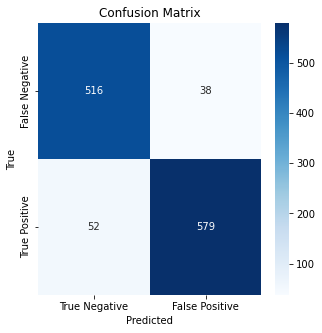

In [39]:
conf_mat = confusion_matrix(yr_test, yr_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### AUC-ROC 

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
# Predict the probability of positive class
yr_score = model_smoteenn.predict_proba(xr_test)[:, 1]

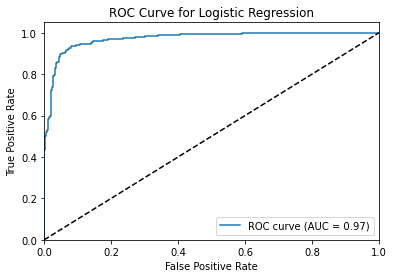

In [42]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(yr_test, yr_score)
roc_auc = roc_auc_score(yr_test, yr_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [43]:
xrf_train1,xrf_test1,yrf_train1,yrf_test1 = train_test_split(X_resampled, y_resampled,test_size=0.2)

In [44]:
model_xrf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_xrf.fit(xrf_train1,yrf_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [45]:
yrf_predict1 = model_xrf.predict(xrf_test1)
model_score_r1 = model_xrf.score(xrf_test1, yrf_test1)

In [46]:
model_score_r1

0.9409282700421941

In [47]:
print(metrics.classification_report(yrf_test1, yrf_predict1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       541
           1       0.94      0.95      0.95       644

    accuracy                           0.94      1185
   macro avg       0.94      0.94      0.94      1185
weighted avg       0.94      0.94      0.94      1185



In [48]:
print(metrics.confusion_matrix(yrf_test1, yrf_predict1))

[[505  36]
 [ 34 610]]


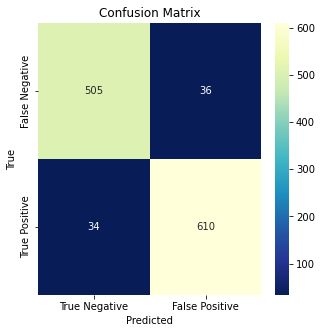

In [49]:
conf_mat = confusion_matrix(yrf_test1, yrf_predict1)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# Predict the probability of positive class
y_score = model.predict_proba(xrf_test1)[:, 1]

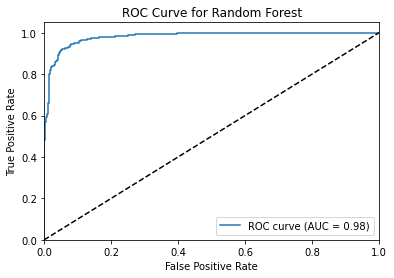

In [51]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(yrf_test1, y_score)
roc_auc = roc_auc_score(yrf_test1, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
xgb_train,xgb_test,ygb_train,ygb_test = train_test_split(X_resampled, y_resampled,test_size=0.2)

In [54]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC
gbc.fit(xgb_train,ygb_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [55]:
# Accuracy of model

print("Gradient Boost accuracy is %2.2f" % accuracy_score( 
     ygb_test, gbc.predict(xgb_test)))

Gradient Boost accuracy is 0.96


In [56]:
pred=gbc.predict(xgb_test)
print(classification_report(ygb_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       573
           1       0.96      0.97      0.97       612

    accuracy                           0.96      1185
   macro avg       0.96      0.96      0.96      1185
weighted avg       0.96      0.96      0.96      1185



In [57]:
print(confusion_matrix(ygb_test, gbc.predict(xgb_test)))

[[549  24]
 [ 19 593]]


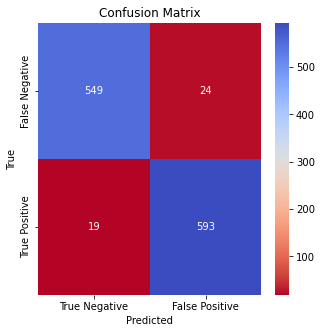

In [58]:
conf_mat = confusion_matrix(ygb_test, gbc.predict(xgb_test))

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##### Gradient boosting gave as a better accuracy of 0.96 which was even better than Random Forest and Logistic Regression.

In [59]:
# Predict the probability of positive class
y_score = model.predict_proba(xgb_test)[:, 1]

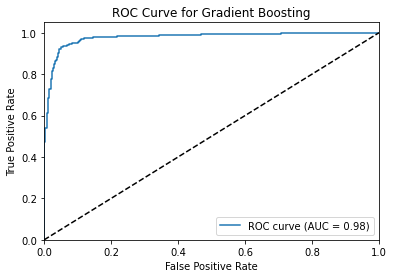

In [60]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(ygb_test, y_score)
roc_auc = roc_auc_score(ygb_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

#### Model's performance using cross-validation

Cross-validation is a technique for evaluating the performance of a machine learning model by splitting the data into multiple folds, training the model on a portion of the data, and evaluating it on the remaining portion. 

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [62]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [63]:
scores = cross_val_score(gbc,xgb_train,ygb_train, cv=kfold)

In [64]:
print("Model Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Model Accuracy: 95.74% (0.85%)


After doing cross validation, we reached 96.14% accuracy.

#### Random search technique for hyperparameter tuning

In [65]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Define the hyperparameter search space
param_dist = {'learning_rate': uniform(0.01, 1.0),
              'n_estimators': range(50, 500),
              'max_depth': range(1, 11),
              'min_samples_split': range(2, 21),
              'min_samples_leaf': range(1, 21),
              'subsample': uniform(0.01, 1.0)}

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(xgb_train,ygb_train)

# Print the best hyperparameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'learning_rate': 0.4043214255234593, 'max_depth': 8, 'min_samples_leaf': 13, 'min_samples_split': 20, 'n_estimators': 460, 'subsample': 0.8958246435293752}


In [67]:
accuracy = accuracy_score(ygb_test, pred)

In [68]:
print('Accuracy:',accuracy)

Accuracy: 0.9637130801687763


Therefore we can say that our model accuracy has improved from 96.14 to 96.45.

In [69]:
import pickle

In [175]:
filename = 'Model.sav'
pickle.dump(gbc, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score = load_model.score(xgb_test,ygb_test)
model_score

0.9645569620253165

In [176]:
# loading the saved model
loaded_model = pickle.load(open('Model.sav', 'rb'))

In [ ]:


# Train your model
model = ...

# Save the model to a .sav file
joblib.dump(model, "model.sav")

In [70]:
# Initialize the models
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy','Precision','Recall','F1-score'])

# Fit and evaluate each model
for model, name in zip(models, model_names):
    model.fit(x, y)
    accuracy = model.score(x, y)
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results dataframe
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.886751
1        Random Forest       1.0
2    Gradient Boosting  0.926786
